In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
med_inpatient = pd.read_csv('Medicare_Charge_Inpatient_DRG100_DRG_Summary_by_DRG_FY2011.csv')

In [3]:
med_outpatient = pd.read_csv('Medicare_Charge_Outpatient_APC30_Summary_by_APC_CY2011.csv')

In [4]:
provider_charge_inpatient = pd.read_csv('Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')

In [5]:
provider_charge_outpatient = pd.read_csv('Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv')

In [6]:
med_inpatient.columns = med_inpatient.columns.str.replace(' ', '_')

In [7]:
med_outpatient.columns = med_outpatient.columns.str.replace(' ', '_')

In [8]:
provider_charge_inpatient.columns = provider_charge_inpatient.columns.str.replace(' ', '_')

In [9]:
provider_charge_outpatient.columns = provider_charge_outpatient.columns.str.replace(' ', '_')

In [10]:
med_inpatient.head()

,DRG_Definition,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,37861,29228.55368,6902.381289,5514.435910
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,37927,23924.98059,6809.799325,5791.920242
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,68163,49186.95644,13614.616130,12415.825360
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,110983,30371.27399,8037.269492,6858.689088
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,62346,23300.06199,5762.881821,4508.202659


In [11]:
provider_charge_inpatient.head(2)

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_(HRR)_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286


In [12]:
med_outpatient.head()

,APC,Outpatient_Services,Average_Estimated_Submitted_Charges,Average_Total_Payments
0,0012 - Level I Debridement & Destruction,275987,74.202956,16.147079
1,0013 - Level II Debridement & Destruction,434706,196.170070,56.133853
2,0015 - Level III Debridement & Destruction,509576,326.503444,97.156250
3,0019 - Level I Excision/ Biopsy,27860,2013.181972,330.908369
4,0020 - Level II Excision/ Biopsy,40642,3161.457873,567.156154


In [13]:
provider_charge_outpatient.head(2)

,APC,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_(HRR)_Description,Outpatient_Services,Average__Estimated_Submitted_Charges,Average_Total_Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853


## Part 1

### Part1 a) Highest Cost Variation

In [14]:
#inpatient = pd.merge(left = med_inpatient, right = provider_charge_inpatient, on = 'DRG_Definition', how = 'inner')

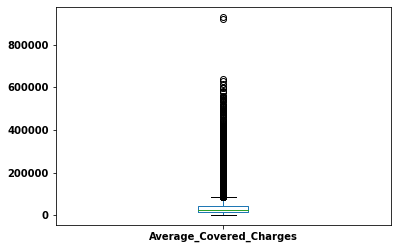

In [15]:
provider_charge_inpatient.Average_Covered_Charges.plot(kind = 'box')

In [16]:
provider_charge_inpatient.groupby(['Provider_Id'])['Average_Covered_Charges'].mean().reset_index().sort_values(by= 'Average_Covered_Charges', ascending = False).head(3)

,Provider_Id,Average_Covered_Charges
3143,490142,211922.000000
1845,310025,147441.337388
401,50464,144695.837072


### Part 1b)

In [17]:
p1 = provider_charge_inpatient[['DRG_Definition' ,'Provider_Id', 'Provider_Name', 'Average_Covered_Charges']]
p1.rename(columns={'DRG_Definition' : 'Procedure_Name'}, inplace=True)
p1.head()

C:\Users\Yoga 500\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Procedure_Name,Provider_Id,Provider_Name,Average_Covered_Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,32963.07692
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,15131.85714
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,37560.37500
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,13998.28000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,31633.27778


In [18]:
p2 = provider_charge_outpatient[['APC' ,'Provider_Id', 'Provider_Name', 'Average__Estimated_Submitted_Charges']]
p2.rename(columns={'APC' : 'Procedure_Name', 
                   'Average__Estimated_Submitted_Charges' : 'Average_Covered_Charges'}, inplace=True)
p2.head()

,Procedure_Name,Provider_Id,Provider_Name,Average_Covered_Charges
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,78.086957
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,149.589749
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",50.135411
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,112.400000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",152.045455


In [19]:
p3=p1.append(p2)
p3.head()

,Procedure_Name,Provider_Id,Provider_Name,Average_Covered_Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,32963.07692
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,15131.85714
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,37560.37500
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,13998.28000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,31633.27778


In [20]:
high_cost_providers = p3.groupby(['Provider_Id', 'Provider_Name']).Average_Covered_Charges.sum().reset_index()

In [21]:
high_cost_providers = high_cost_providers.sort_values(by= 'Average_Covered_Charges', ascending = False)
high_cost_providers=high_cost_providers.head(7)
high_cost_providers.round(2)

,Provider_Id,Provider_Name,Average_Covered_Charges
2531,390180,CROZER CHESTER MEDICAL CENTER,13380584.70
453,50625,CEDARS-SINAI MEDICAL CENTER,12378130.46
395,50441,STANFORD HOSPITAL,12152650.55
306,50195,WASHINGTON HOSPITAL,10561991.45
401,50464,DOCTORS MEDICAL CENTER,10189266.21
301,50180,JOHN MUIR MEDICAL CENTER - WALNUT CREEK CAMPUS,10168594.92
445,50599,UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER,9943475.81


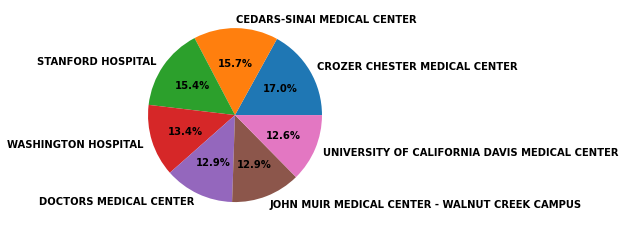

In [22]:
#highest_provider_out.plot( y='Provider_Name', kind='pie', autopct = '%1.1f%%')
plt.pie(high_cost_providers.Average_Covered_Charges, labels=high_cost_providers.Provider_Name, autopct = '%1.1f%%')
plt.show()

### Part1c)

In [23]:
in_region = provider_charge_inpatient[['DRG_Definition' ,'Hospital_Referral_Region_(HRR)_Description', 'Average_Covered_Charges']]
in_region.rename(columns={'DRG_Definition' : 'Procedure_Name'}, inplace=True)
in_region.head()

C:\Users\Yoga 500\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Procedure_Name,Hospital_Referral_Region_(HRR)_Description,Average_Covered_Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Dothan,32963.07692
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,15131.85714
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,37560.37500
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,13998.28000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,31633.27778


In [24]:
out_region = provider_charge_outpatient[['APC' ,'Hospital_Referral_Region_(HRR)_Description', 'Average__Estimated_Submitted_Charges']]
out_region.rename(columns={'APC' : 'Procedure_Name', 
                   'Average__Estimated_Submitted_Charges' : 'Average_Covered_Charges'}, inplace=True)
out_region.head()

,Procedure_Name,Hospital_Referral_Region_(HRR)_Description,Average_Covered_Charges
0,0012 - Level I Debridement & Destruction,AL - Birmingham,78.086957
1,0012 - Level I Debridement & Destruction,AK - Anchorage,149.589749
2,0012 - Level I Debridement & Destruction,AZ - Tucson,50.135411
3,0012 - Level I Debridement & Destruction,AZ - Mesa,112.400000
4,0012 - Level I Debridement & Destruction,AZ - Tucson,152.045455


In [25]:
region=in_region.append(out_region)
region.head()

,Procedure_Name,Hospital_Referral_Region_(HRR)_Description,Average_Covered_Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Dothan,32963.07692
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,15131.85714
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,37560.37500
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,13998.28000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,31633.27778


In [26]:
high_cost_regions = region.groupby('Hospital_Referral_Region_(HRR)_Description').Average_Covered_Charges.sum().reset_index()

In [27]:
high_cost_regions = high_cost_regions.sort_values(by= 'Average_Covered_Charges', ascending = False)
high_cost_regions=high_cost_regions.head(7)
high_cost_regions.rename(columns = {'Hospital_Referral_Region_(HRR)_Description' : 'Regions'}, inplace = True)
high_cost_regions.round(2)

,Regions,Average_Covered_Charges
21,CA - Los Angeles,2.510713e+08
232,PA - Philadelphia,1.725620e+08
264,TX - Houston,1.168319e+08
187,NJ - Camden,1.097828e+08
260,TX - Dallas,9.979202e+07
71,GA - Atlanta,8.810916e+07
201,NY - East Long Island,8.809044e+07


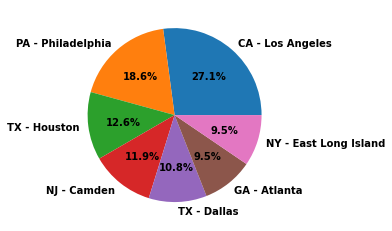

In [28]:
plt.pie(high_cost_regions.Average_Covered_Charges, 
        labels=high_cost_regions.Regions, autopct = '%1.1f%%')
plt.show()